## Inroduction to Probabilistic Machine Learning  

Family name: Dominguez

Name: Ivan

Date: 9-02-2026

### The exponential distribution
Given an exponential random variable whose pdf is
$$
\text{exp\_pdf}\left(x, \lambda \right) = \frac{1}{Z(\lambda)} \exp\left(- \lambda x \right)
$$

[TODO] Derive using markdown + latex:
1. The normalization constant $ Z(\lambda)$

In order to normalize exp_pdf we have it's definition firstly: 

$$ \int_{- \infty}^{\infty} dx \ \text{exp\_pdf}(x;\lambda) = 1 $$

Using its definition:

$$ \frac{1}{Z(\lambda)}\int_{0}^{\infty} dx \exp(-\lambda x) = 1 \to \frac{1}{-\lambda Z(\lambda)} \int_{0}^{\infty} dx -\lambda \exp(-\lambda x) = $$

$$ = \frac{1}{-\lambda Z(\lambda)} [\exp(-\lambda x)]_{0}^{\infty} =  \frac{1}{-\lambda Z(\lambda)} (0-1) = 1 \to Z(\lambda) = \frac{1}{\lambda}$$

And so the function should look like this:

$$
\text{exp\_pdf}\left(X, \lambda \right) = \lambda \exp\left(- \lambda x \right)
$$

2. The cdf

$$

\text{exp\_cdf}(X) = \int_{-\infty}^x dx' \text{exp\_pdf}(x') = \int_{-\infty}^x dx' \lambda \exp(-\lambda x') = 1 - \exp(-\lambda x)


$$

3. The inverse cdf

$$

p = 1- \exp(-\lambda x) \to \exp(-\lambda x) = p-1 \to x = \frac{1}{-\lambda} \log(y-1)

$$

So we finally have:

$$

\text{exp\_cdf}^{-1}(x) = \frac{1}{-\lambda} \log(x-1)

$$

In [1]:
import numpy as np
from tools import exp_distribution

In order to obtain a set of numbers distributed as the pdf, we shall use the method of the inverse. The idea is shown here:

The cdf fuction returns the probability (as we know, in the $[0, 1]$ interval) of a random variable $X$ taking a value of $x$:

$$

\text{exp\_cdf}: \mathbb{R} \to [0,1]  \ \text{tq} \ \text{exp\_cdf}(x) = P(X\leq x)

$$

So in order to obtain such a set of random numbers distributed as the pdf, the idea is to map, using the inverse of cdf, a set of numbers distributed uniformly in the interval $[0, 1]$, to our pdf. We defined the inverse of the cdf as:

$$

\text{exp\_cdf}: [0,1] \to \mathbb{R}  \ \text{tq} \ \text{exp\_cdf}^{-1}(x) = \frac{1}{-\lambda} \log(y-1)

$$

So maping this set of 100000 random numbers distributed uniformly in the interval we said using the inverse of the cdf, we obtain a new set of 100000 random numbers distributed as the pdf, as its shown in the next cell:

In [2]:
# [TODO] Generate an iid sample of the exponential distribution using the method of the inverse 

rng = np.random.default_rng(123)
lam_true = 1.5
N = 100000

# Creating a 100000-size set of numbers in the [0, 1) interval:

X = rng.random(size=N)

# So now we should create a vectorizer to "map" every number to the pdf appliying the inverse of cdf to each element of this set:

vectorize_exp = np.vectorize(exp_distribution.exp_inv)

# And we apply now the function, obtaining this X_exp array of elements distributed as the pdf:

X_exp = vectorize_exp(X, lam=lam_true)

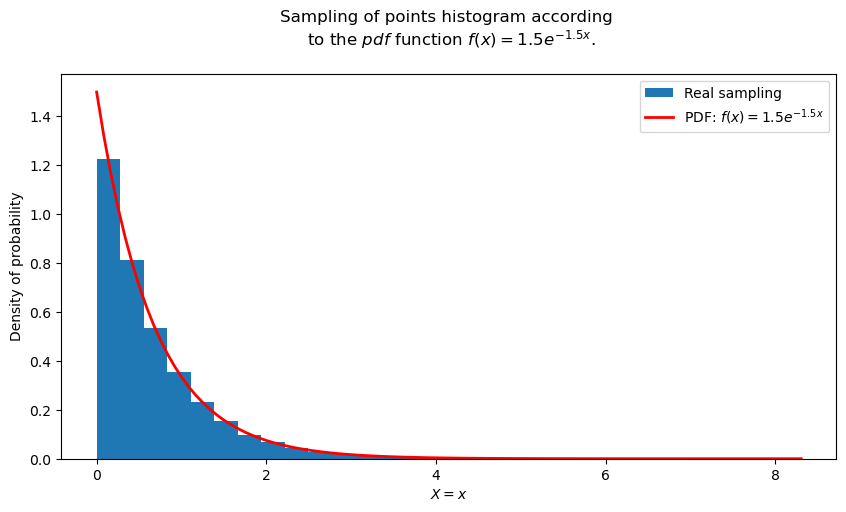

In [3]:
# [TODO] Plot the histogram of the sample and compare with pdf

import matplotlib.pyplot as plt

teorical_x = np.linspace(min(X_exp), max(X_exp), 100)
teorical_y = 1.5 * np.exp(-1.5 * teorical_x)

plt.figure(figsize=(10, 5))
plt.hist(X_exp, density=True, bins=30, label='Real sampling') 
# we can play with the number of bins to see 
# how the real sampling fits to the theorical pdf 
plt.xlabel('$X=x$')
plt.ylabel('Density of probability')
plt.title('Sampling of points histogram according \n to the $pdf$ function $f(x) = 1.5 e^{-1.5x}$.\n')
plt.plot(teorical_x, teorical_y, color='red', lw=2, label='PDF: $f(x) = 1.5 e^{-1.5x}$')
plt.legend();

## Maximum Likelihood estimate of $\lambda$

[TODO] Derive using markdown + latex:
1. The expression of the likelihood function for the iid sample $ \mathcal{D} = \left\{X_n \right\}_{n=1}^N$
2. The value of $\lambda$ that maximizes the likelihood

#### Solution:
The likelihood is
$$
\mathcal{L}(\lambda; \mathcal{D}) = P\left( \mathcal{D}  \vert \lambda \right) 
= P\left( \left\{X_n \right\}_{n=1}^N  \vert \lambda \right) 
= \prod_{n=1}^N \mathrm{exp\_pdf}\left( X_n ; \lambda \right) 
= \prod_{n=1}^N \left(\lambda \exp\left( - \lambda X_n \right)\right) 
= \lambda^N \exp\left(-\lambda \sum_{n=1}^N X_n\right).
$$

The corresponding log-likelihood  is
$$
\mathcal{LL}(\lambda; \mathcal{D})
= \log \mathcal{L}(\lambda; \mathcal{D})
= N \log \lambda - \lambda \sum_{n=1}^N X_n.
$$

Taking the derivative of this likelihood with respect to $\lambda$,
$$
\frac{d\mathcal{LL}(\lambda; \mathcal{D})}{d\lambda}
= \frac{N}{\lambda} - \sum_{n=1}^N X_n.
$$

Setting the derivative equal to zero gives
$$
\frac{N}{\lambda_{ML}^*} - \sum_{n=1}^N X_n = 0 
\quad \Longrightarrow \quad
\frac{N}{\lambda_{ML}^*} = \sum_{n=1}^N X_n.
$$
Hence the maximum likelihood estimator is
$$
\lambda_{ML}^* = \frac{N}{\sum_{n=1}^N X_n}
= \frac{1}{\hat{\mu}_X},
$$
where
$$
\hat{\mu}_X = \frac{1}{N}\sum_{n=1}^N X_n.
$$

The second derivative,
$$
\frac{d^2\mathcal{LL}(\lambda; \mathcal{D})}{d\lambda^2}
= -\frac{N}{\lambda^2} < 0,
$$
is negative, which confirms that this critical point (zero derivative) is a maximum.


### Numerical maximization of the likelikood 

We shall now use a numerical method to maximize the likelihood and compare with the closed-form solution.

In [4]:
# [TODO]

from tools import probabilistic_fit

# Here we use the formula:
lam_mle_analytic = 1 / np.mean(X_exp)
# Here we minimize the negative likelihood starting 
# in x0=1 so we dont get any infinite values. 
lam_mle_numerical =  probabilistic_fit.maximum_likelihood_fit(exp_distribution.exp_inv, X)

print(lam_mle_analytic, lam_mle_numerical)

1.5015485268060857 1.5015485187705837


## MAP estimate of $\lambda$
Assume the conjugate prior
$$
\lambda \sim \mathrm{Gamma}(\alpha,\beta),
$$
with density
$$
p(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta \lambda}.
$$

[TODO] Derive using markdown + latex:
1. the expression of the posterior assuming the Gamma prior for $\lambda$, 
2. the value of $\lambda$ that maximizes the posterior.  

The posterior is:

$$

P(\lambda | \mathcal{D})

$$

As we know using the Bayes Theorem this is:

$$

P(\lambda | \mathcal{D}) = \frac{P(\mathcal{D} | \lambda) P(\lambda)}{P(\mathcal{D})}

$$

As $\mathcal{D}$ has nothing to do with $\lambda$, $P(D)$ won't change the MAP. So we have to maximize:

$$

\lambda_{MAP}^* = \operatorname{argmax}(P(\mathcal{D})P(\lambda)) = \operatorname{argmin}(- \operatorname{log}(P(\mathcal{D}|\lambda)P(\lambda)))=\operatorname{argmin}(-\operatorname{log}(P(\mathcal{D}|\lambda)) - \operatorname{log}(P(\lambda)))

$$

In order to minimze we should take its derivative with respect to $\lambda$:

$$

\frac{d \lambda_{MAP}^*}{d\lambda} = \frac{d(-\operatorname{log}(P(\mathcal{D}|\lambda)))}{d\lambda} + \frac{d(-\operatorname{log}(P(\lambda)))}{d\lambda}

$$

As we showed before, $$\frac{d(-\operatorname{log}(P(\mathcal{D}|\lambda)))}{d\lambda} = \frac{N}{\lambda} - \sum{n=1}^{N} x_n$$ so now he actually have

$$

\frac{d \lambda_{MAP}^*}{d\lambda} = \frac{N}{\lambda} - \sum{n=1}^{N} x_n - \frac{d(-\operatorname{log}(\frac{\beta^\alpha}{\Gamma(\alpha)})\lambda^{\alpha-1}e^{-\beta\lambda})}{d\lambda}

$$

Operating we have

$$

\frac{d \lambda_{MAP}^*}{d\lambda} = \frac{N}{\lambda} - \sum{n=1}^{N} x_n + \frac{d(-(\alpha-1)\operatorname{\lambda})}{d\lambda} + \frac{d(\beta\lambda)}{d\lambda} =

\frac{N}{\lambda} - \sum{n=1}^{N} x_n + \frac{\alpha -1 }{\lambda} + \beta

$$

Equaling to zero:

$$

\frac{N}{\lambda} - \sum{n=1}^{N} x_n + \frac{\alpha -1 }{\lambda} + \beta = 0 \to \lambda_{MAP}^* = -\frac{\alpha - N - 1}{\sum_{n=1}^Nx_n + \beta}

$$


### Numerical maximization of the posterior 

We shall now use a numerical method to maximize the posterior.

In [5]:
# [TODO]

alpha = 4.0
beta = 0.1

lam_map_analytic = - (alpha-N-1) / (np.sum(X_exp) + beta)
lam_map_numerical = probabilistic_fit.maximum_posterior_fit(exp_distribution.exp_inv, X, alpha, beta)

print(lam_map_analytic, lam_map_numerical)

1.5015012257733278 1.5015057047628968


### Questions
[TODO] Answer these question using markdown + latex:
1. What are the values of the mean, the standandard deviation, and the mode of the prior of $\lambda$?

Assuming the prior of $\lambda$ is distributed according to a Gamma distribution

$$
\lambda \sim \mathrm{Gamma}(\alpha,\beta),
$$
with density
$$
p(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta \lambda}.
$$

And as we can tell loking at https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma, the mean of the prior is

$$\frac{\alpha}{\lambda}$$

the standard deviation is

$$ \sqrt{\frac{\alpha}{\lambda^2}}$$

and the mode is

$$\begin{cases}

\frac{\alpha-1}{\lambda} & \text{if } x \geq 0 \\
0 & \text{else}

\end{cases}$$

2. How different are the ML and MAP estimates of $\lambda$?
    * When the sample size \(N = 100\) are they very different?

    They are actually pretty different. In this case $\lambda_{ML}^* = 1.72$ and $\lambda_{MAP}^* = 1.66$. 

    * When the sample size \(N = 1000\) are they very different?

    The difference is not that big in this case as $\lambda_{ML}^* = 1.496$ and $\lambda_{MAP}^* = 1.491$. 

3. What do you conclude from the answers to the previous questions?

Its easy to see that if $N\to \infty$ then $$\lambda_{ML}^* = \lambda_{MAP}^*$$

### Summary and conclusions 
[TODO] Summary and conclusions of what I have learned using markdown + latex:

As we see in the previous cell, when $N\to \infty$ then $$\lambda_{ML}^* = \lambda_{MAP}^*$$ This is not trivial, as it appear to be the reason why we normally don't maximize the posterior, but the likelihood.  